# Code For Generating a 6x8 Image

## 1. Grayscale Image

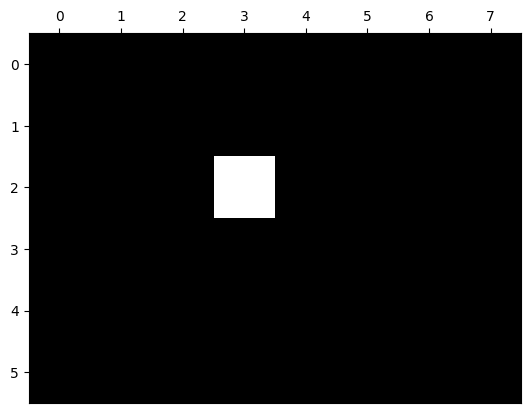

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = np.zeros((6,8),dtype=np.uint8)
im[2,3] = 255

fig ,ax = plt.subplots()
ax.imshow(im, cmap='gray', vmin=0, vmax=255 )
ax.xaxis.tick_top()
plt.show()

## 2. Colour Image

[255 100 100]


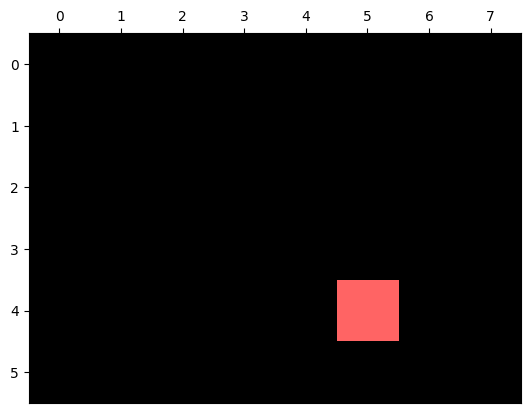

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = np.zeros((6,8,3), dtype = np.uint8)
im[4,5] = [255,100,100]
print(im[4,5])

fig , ax = plt.subplots()
ax.imshow(im)
ax.xaxis.tick_top()
plt.show()

# Opening and Displaying Images

## 1. Displaying Using Matplotlib

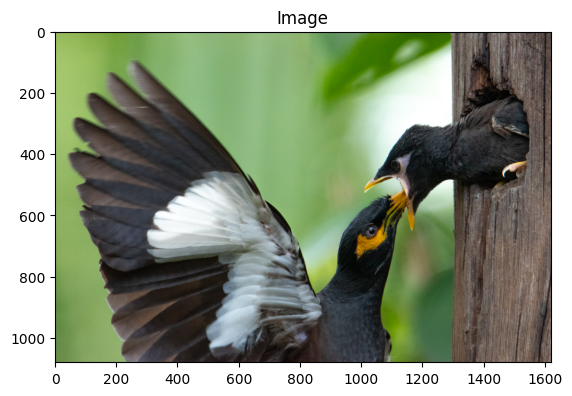

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg',cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #In matplotlib,the output colour space is RGB but in OpenCV, it is BGR. So it should be converted to RGB before showing the image in matplotlib

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Image')
plt.show()

## 2. Displaying Using OpenCV

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg', cv.IMREAD_COLOR)
cv.namedWindow('Image',cv.WINDOW_NORMAL)
cv.imshow('Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

# Displaying Image Properties

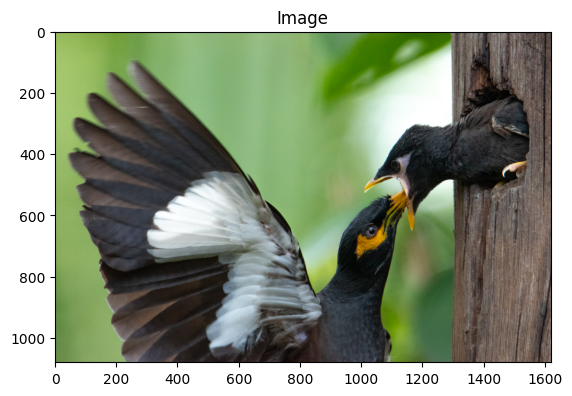

img.shape =  (1080, 1620, 3)
img.size =  5248800
img.dtype =  uint8


In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg',cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #In matplotlib,the output colour space is RGB but in OpenCV, it is BGR. So it should be converted to RGB before showing the image in matplotlib

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Image')
plt.show()

#Image Properties
print("img.shape = " ,img.shape)
print("img.size = " ,img.size)
print("img.dtype = " ,img.dtype)

# Increasing Brightness Using OpenCV

Text(0.5, 1.0, ' cv.addWeighted ')

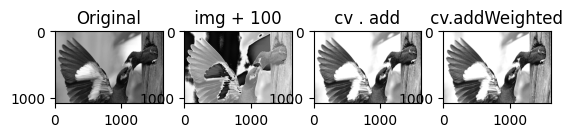

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread( 'N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg' , cv.IMREAD_GRAYSCALE)
imgb = img + 100
imgc = cv.add(img, 100)
im = cv.addWeighted(img,1,100,1,0)

f , ax = plt . subplots ( 1 , 4 )

ax [ 0 ] . imshow(img , cmap= 'gray' )
ax [ 0 ] . set_title( 'Original' )

ax [ 1 ] . imshow( imgb , cmap= 'gray' )
ax [ 1 ] . set_title(' img + 100 ' )

ax [ 2 ] . imshow( imgc , cmap= 'gray' )
ax [ 2 ] . set_title( ' cv . add ' )

ax [ 3 ] . imshow( im , cmap= 'gray' )
ax [ 3 ] . set_title( ' cv.addWeighted ' )

# Increasing Brightness Using Loops I

2.9 s ± 88.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Text(0.5, 1.0, 'Image Brighten')

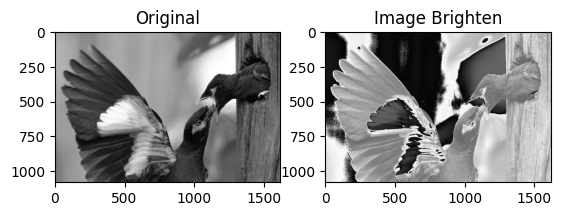

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def image_brighten(image, shift):
  h = image.shape[0]
  w = image.shape[1]
  result = np.zeros(image.shape, image.dtype)

  for i in range(0,h):
    for j in range(0,w):
      no_overflow = True if image[i,j] + shift < 255 else False
      result[i,j] = min(image[i,j] + shift, 255) if no_overflow else 255

  return result

img = cv . imread ( 'N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg' , cv.IMREAD_GRAYSCALE)

%timeit imgb = image_brighten ( img , 200)

f , ax = plt.subplots ( 1 , 2 )

ax [ 0 ] . imshow( img , cmap = 'gray')
ax [ 0 ] . set_title( 'Original' )

ax [ 1 ] . imshow( imgb , cmap = 'gray' )
ax [ 1 ] . set_title( 'Image Brighten' )

# Increasing Brightness Using Loops II

## Method 1

In [15]:
import cv2
import numpy as np

def increase_brightness_opencv(image, value):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)
    v = np.clip(v + value, 0, 255)
    hsv_image = cv2.merge((h, s, v))
    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

# Load an image
image = cv2.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg')

# Increase brightness by a value (you can adjust this value as needed)
brighter_image = increase_brightness_opencv(image, 200)

# Display the result
cv2.imshow('Original Image', image)
cv2.imshow('Brighter Image', brighter_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



## Method 2

Text(0.5, 1.0, 'Image Brighten')

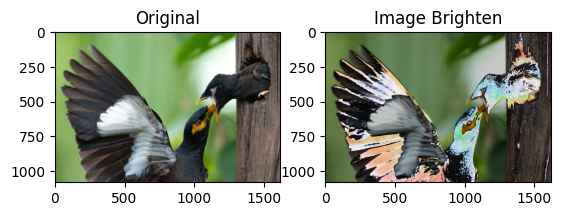

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


def increase_brightness_opencv(image, value):

  # Convert the image to the HSV color space
  hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

  # Split the HSV image into its individual channels
  h, s, v = cv.split(hsv_image)

  # Increase the value (brightness) channel by the specified value
  v = np.clip(v + value, 0, 255)

  # Merge the channels back together
  hsv_image = cv.merge((h, s, v))

  # Convert the HSV image back to the BGR color space and return
  Brightened_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)
  return Brightened_image


img = cv . imread ( 'N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

%timeit 
imgb = increase_brightness_opencv( img , 200)

f , ax = plt.subplots ( 1 , 2 )

ax [ 0 ] . imshow( img , cmap = 'gray')
ax [ 0 ] . set_title( 'Original' )

ax [ 1 ] . imshow( imgb , cmap = 'gray' )
ax [ 1 ] . set_title( 'Image Brighten' )

# Explanation

* The function increase_brightness_opencv takes an input image and a value as parameters. It increases the brightness of the input image by adding the specified value to the V channel (brightness channel) of the HSV (Hue, Saturation, Value) color space.

* Here's what each step in the function does:

1. hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV): Convert the input BGR image (Blue, Green, Red channels) to the HSV color space.
2. h, s, v = cv2.split(hsv_image): Split the HSV image into its individual channels, namely H (Hue), S (Saturation), and V (Value).
3. v = np.clip(v + value, 0, 255): Increase the brightness of the V channel by adding the specified value. The np.clip function ensures that the pixel values stay within the range of [0, 255], as pixel values cannot be negative or greater than 255.
4. hsv_image = cv2.merge((h, s, v)): Merge the modified H, S, and V channels back into an HSV image.
5. return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR): Convert the modified HSV image back to the BGR color space (used by OpenCV) to get the final brightened image.

* The reason we convert the color space from BGR to HSV is that the HSV color space separates the color information from the brightness (also known as value or V) information. This separation makes it easier to manipulate the brightness independently of the color, which is particularly useful for operations like adjusting image brightness.
* 
In the BGR (Blue-Green-Red) color space, the color information is encoded in the three channels (B, G, R), and any modification to the pixel values will affect both color and brightness simultaneously. If we were to simply increase the pixel values in the BGR space to brighten the image, it would change the color balance and may not give the desired resu
* 

On the other hand, the HSV (Hue-Saturation-Value) color space represents colors in a way that separates the hue (the type of color), saturation (the intensity or vividness of the color), and value (brightness) into individual channels. In HSV, the brightness channel (V) directly represents the intensity of light in each pixel, making it more intuitive to adjust brightness independently without altering the or
*
* .

By converting the image to HSV and modifying only the V channel to increase brightness, we keep the hue and saturation unchanged, resulting in a natural and accurate adjustment of brightness without affecting the color iatrm
*
* on.

This separation of color and brightness is one of the advantages of the HSV color space for certain image processing tasks, such as brightness adjustments, color filtering, and color-based obtection

ocessing.


# Zeroing out Green and Blue Planes

## Zeroing out Green and Blue Planes

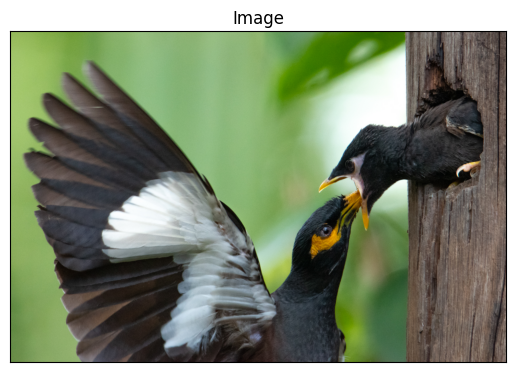

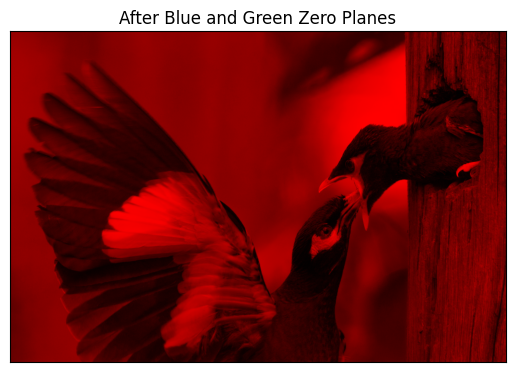

In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg')

if img is None:
    print('Image could not be read')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

img[:,:,1:3] = 0

plt.imshow(img)
plt.title('After Blue and Green Zero Planes')
plt.xticks([]), plt.yticks([])
plt.show()


## Zeroing Out Red and Green Planes

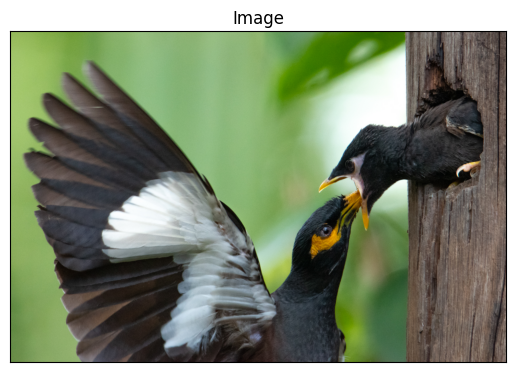

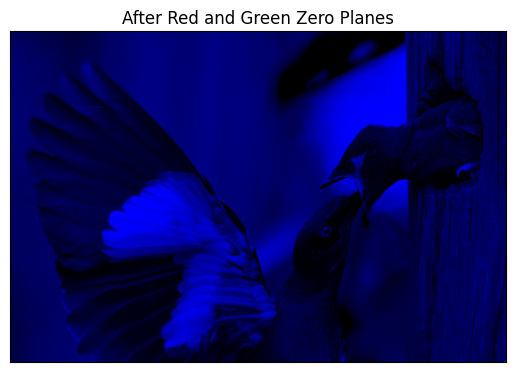

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg')

if img is None:
    print('Image could not be read')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

img[:,:,0:2] = 0

plt.imshow(img)
plt.title('After Red and Green Zero Planes')
plt.xticks([]), plt.yticks([])
plt.show()

## Zeroing Out Blue and Red Planes

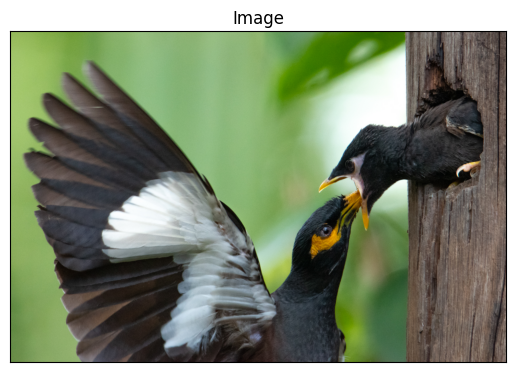

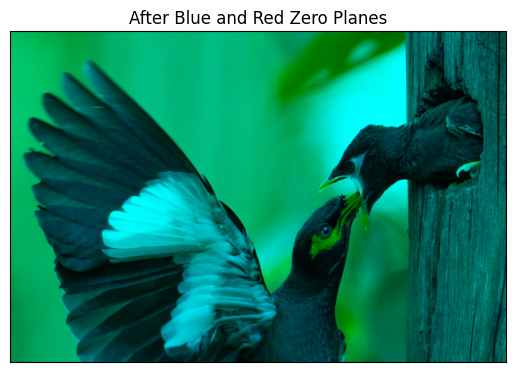

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2 as cv

img = cv.imread('N:/Photography/Nikon D5600/For Competitions/New folder/Eat_will_you.jpg')

if img is None:
    print('Image could not be read')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Image')
plt.xticks([]), plt.yticks([])
plt.show()

img[:,:,0:1] = 0

plt.imshow(img)
plt.title('After Blue and Red Zero Planes')
plt.xticks([]), plt.yticks([])
plt.show()